In [1]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
#notify=Audio(url = url, autoplay = True)
notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [26]:
experiment = pybamm.Experiment(
    [
        (
            "Discharge at .0422 A for 8.25 hours or until 2.2 V",
            "Charge at .1 A for 15 hours or until 2.4 V"
        ),
    ],
)


model = pybamm.lithium_sulfur.ZeroD_Chemistry_1()

param = model.default_parameter_values
param.update(
    {
        "Standard Potential L [V]": 1.95,
        "Standard Potential M [V]": 1.98,
        "Standard Potential H [V]": 2.35
        
    }
)


sim = pybamm.Simulation(
    model,
    experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
time_in_seconds = 100000
sim.solve()#np.linspace(0, time_in_seconds, int(time_in_seconds/10)))

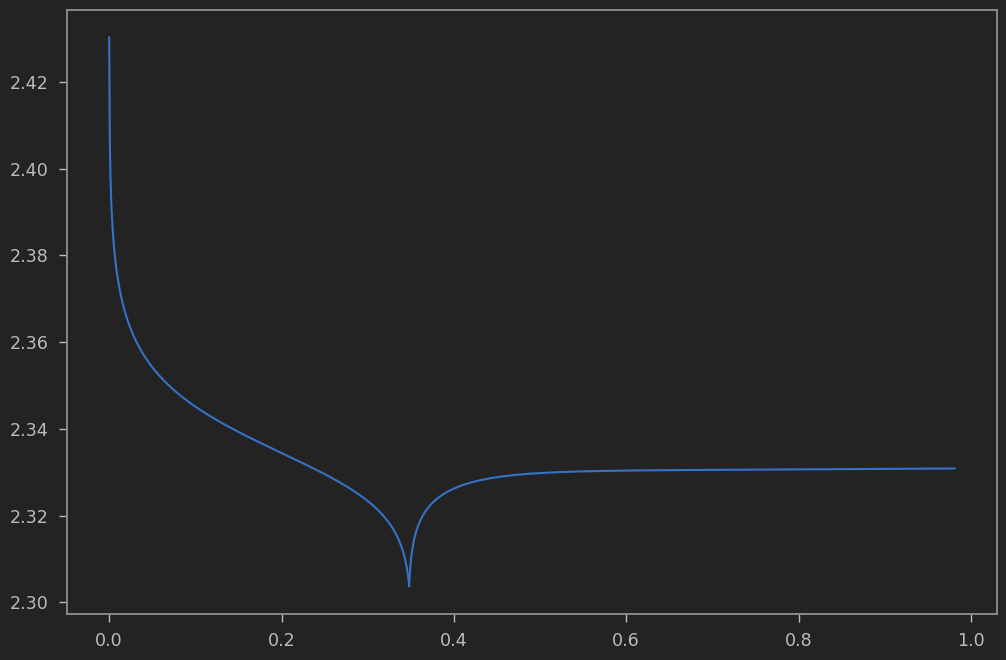

In [27]:
plt.plot(0.0422*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)